## Final Project Submission

Please fill out:
* Student name: Matt LeRoi
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


In [117]:
# Your code here - remember to use markdown cells for comments as well!

Business Understanding

Data Understanding

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import sqlite3
%matplotlib inline
pd.set_option('display.max_columns', None)

In [119]:
gross=pd.read_csv("./data/bom.movie_gross.csv.gz")
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [120]:
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [121]:
budget = pd.read_csv("./data/tn.movie_budgets.csv.gz")
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [122]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [123]:
# Convert $ columns to numbers
budget.production_budget = pd.to_numeric(budget.production_budget.str.replace('[$,]',''))
budget.domestic_gross = pd.to_numeric(budget.domestic_gross.str.replace('[$,]',''))
budget.worldwide_gross = pd.to_numeric(budget.worldwide_gross.str.replace('[$,]',''))

In [124]:
# Creating columns for release month, release year, profit (based on worldwide gross), and ROI (Return on Invenstment, as %)
budget['month']= pd.to_datetime(budget['release_date']).dt.month_name()
budget['year']= pd.to_datetime(budget['release_date']).dt.year
budget['profit'] = budget.worldwide_gross - budget.production_budget
budget['roi'] = 100*budget.profit/budget.production_budget

In [125]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,December,2009,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,June,2019,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,December,2017,999721747,315.369636
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,December,2018,-7000,-100.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,April,1999,234495,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,July,2005,-3662,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,September,2015,-1400,-100.000000


In [126]:
# There are duplicate movie titles

budget.drop_duplicates(subset=['movie','year'], inplace=True)
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,December,2009,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,June,2019,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,December,2017,999721747,315.369636
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,December,2018,-7000,-100.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,April,1999,234495,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,July,2005,-3662,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,September,2015,-1400,-100.000000


In [127]:
conn = sqlite3.connect("./data/im.db") # Open a connection to IMDB file
cursor = conn.cursor() # Initialize cursor

# SQL query to join movie akas, basics, and ratings tables for further analysis

imdb_query = """SELECT *, movie_akas.movie_id as mv_id
                FROM movie_akas 
                join movie_ratings on movie_akas.movie_id = movie_ratings.movie_id
                join movie_basics on movie_akas.movie_id = movie_basics.movie_id
                ;"""

imdb = pd.read_sql(imdb_query, conn)

# Dropping duplicate movie_id columns (leaving the mv_id column I renamed) and "title" column.
imdb.drop(['movie_id','title'],axis = 1, inplace=True)

In [128]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           261806 non-null  int64  
 1   region             218341 non-null  object 
 2   language           37080 non-null   object 
 3   types              153268 non-null  object 
 4   attributes         12924 non-null   object 
 5   is_original_title  261806 non-null  float64
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   primary_title      261806 non-null  object 
 9   original_title     261806 non-null  object 
 10  start_year         261806 non-null  int64  
 11  runtime_minutes    250553 non-null  float64
 12  genres             260621 non-null  object 
 13  mv_id              261806 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 28.0+ MB


In [129]:
imdb.head()

,ordering,region,language,types,attributes,is_original_title,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,mv_id
0,10,BG,bg,None,None,0.0,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610
1,11,JP,None,imdbDisplay,None,0.0,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610
2,12,BR,None,imdbDisplay,None,0.0,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610
3,13,BR,None,None,short title,0.0,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610
4,14,FR,None,imdbDisplay,None,0.0,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610


In [130]:
# Remove redundant rows with same unique identifier
imdb.drop_duplicates(subset=['mv_id'], inplace=True) 

# The unique identifier from IMDB doesn't appear in the budget or gross databases, so I will
# have to use something else. The title alone has a significant number of duplicates, so
# I'm using the combination of title and start year to join the databases. Removing the rows
# in which both are duplicated (773 of 6191) is deemed an acceptable loss of data.
imdb.drop_duplicates(subset=['primary_title','start_year'], inplace=True) 

In [131]:
# Add columns for genres
# I'm creating columns for each genre and listing it as 
# true or false if it applies to each film. In the
# model, I will see which genres have the highest effect on 
# sales and if certain combinations have particular effects.

def add_genre_column (single_genre):
    imdb[single_genre] = imdb['genres'].str.contains(single_genre)

genre_list = []
for value in imdb['genres'].str.split(','):
    if value is not None:
        genre_list.extend(value)
genre_list = list(set(genre_list))
        
for x in genre_list:
    add_genre_column(x)

In [132]:
# Set index of each dataframe to the movie title and year, then rename for consistency.

gross.set_index(['title','year'], inplace=True)
budget.set_index(['movie','year'], inplace=True)
imdb.set_index(['primary_title','start_year'], inplace=True)
imdb.index.rename(['title','year'], inplace=True)
budget.index.rename(['title','year'], inplace=True)

In [133]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 69032 entries, ('Jurassic World', 2015) to ('Farewell Song', 2019)
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ordering           69032 non-null  int64  
 1   region             57684 non-null  object 
 2   language           5652 non-null   object 
 3   types              23961 non-null  object 
 4   attributes         2003 non-null   object 
 5   is_original_title  69032 non-null  float64
 6   averagerating      69032 non-null  float64
 7   numvotes           69032 non-null  int64  
 8   original_title     69032 non-null  object 
 9   runtime_minutes    62330 non-null  float64
 10  genres             68397 non-null  object 
 11  mv_id              69032 non-null  object 
 12  Sci-Fi             68397 non-null  object 
 13  Music              68397 non-null  object 
 14  Documentary        68397 non-null  object 
 15  Reality-TV         68397 non-

In [134]:
imdb_gross = pd.concat([imdb, gross], axis=1, join="inner")
imdb_budget = pd.concat([imdb, budget], axis=1, join="inner")

In [135]:
imdb_gross

,,ordering,region,language,types,attributes,is_original_title,averagerating,numvotes,original_title,runtime_minutes,genres,mv_id,Sci-Fi,Music,Documentary,Reality-TV,Game-Show,Fantasy,Mystery,Comedy,Western,Musical,Adult,Animation,Adventure,History,Sport,Romance,Drama,Family,Horror,Action,Thriller,Biography,Crime,News,War,studio,domestic_gross,foreign_gross
title,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jurassic World,2015,10,BG,bg,None,None,0.0,7.0,539338,Jurassic World,124.0,"Action,Adventure,Sci-Fi",tt0369610,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,Uni.,652300000.0,"1,019.4"
John Carter,2012,10,UA,None,None,None,0.0,6.6,241792,John Carter,132.0,"Action,Adventure,Sci-Fi",tt0401729,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,BV,73100000.0,211100000
From Paris with Love,2010,10,EE,None,None,None,0.0,6.5,107079,From Paris with Love,92.0,"Action,Crime,Thriller",tt1179034,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,LGF,24100000.0,28700000
The Bourne Legacy,2012,10,RS,None,None,None,0.0,6.7,268678,The Bourne Legacy,135.0,"Action,Adventure,Thriller",tt1194173,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,Uni.,113200000.0,162900000
Limitless,2011,10,AR,None,imdbDisplay,None,0.0,7.4,492490,Limitless,105.0,"Mystery,Sci-Fi,Thriller",tt1219289,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Rela.,79200000.0,82600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Man Who Invented Christmas,2017,10,PT,None,imdbDisplay,None,0.0,7.0,9430,The Man Who Invented Christmas,104.0,"Biography,Comedy,Drama",tt6225520,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,BST,5700000.0,NaN
Poster Boys,2017,1,IN,None,None,None,0.0,5.6,1234,Poster Boys,128.0,Comedy,tt6352548,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Sony,97000.0,2400000
Bending the Arc,2017,1,US,None,None,None,0.0,8.1,93,Bending the Arc,102.0,Documentary,tt6370266,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Abr.,21900.0,NaN


In [137]:
imdb_budget.sort_values('roi')

,,ordering,region,language,types,attributes,is_original_title,averagerating,numvotes,original_title,runtime_minutes,genres,mv_id,Sci-Fi,Music,Documentary,Reality-TV,Game-Show,Fantasy,Mystery,Comedy,Western,Musical,Adult,Animation,Adventure,History,Sport,Romance,Drama,Family,Horror,Action,Thriller,Biography,Crime,News,War,id,release_date,production_budget,domestic_gross,worldwide_gross,month,profit,roi
title,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Independence Daysaster,2013,10,IT,None,imdbDisplay,None,0.0,3.4,974,Independence Daysaster,90.0,"Action,Adventure,Sci-Fi",tt2645670,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,32,"Dec 31, 2013",1800000,0,0,December,-1800000,-100.000000
This Is Martin Bonner,2013,1,US,None,None,None,0.0,6.6,846,This Is Martin Bonner,83.0,Drama,tt1798291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,29,"Jun 21, 2013",42000,0,0,June,-42000,-100.000000
My Girlfriend's Boyfriend,2010,10,IT,None,imdbDisplay,None,0.0,5.8,5461,My Girlfriend's Boyfriend,84.0,"Comedy,Romance",tt1447793,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,26,"May 1, 2010",1400000,0,0,May,-1400000,-100.000000
Light from the Darkroom,2014,1,US,None,None,None,0.0,6.1,11,Light from the Darkroom,90.0,"Action,Drama,Thriller",tt3130704,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,19,"Dec 31, 2014",600000,0,0,December,-600000,-100.000000
Treachery,2013,1,US,None,None,None,0.0,3.7,391,Treachery,67.0,"Drama,Thriller",tt2380301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,5,"Dec 31, 2013",625000,0,0,December,-625000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Moonlight,2016,10,ES,None,imdbDisplay,None,0.0,7.4,227964,Moonlight,111.0,Drama,tt4975722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,64,"Oct 21, 2016",1500000,27854931,65245512,October,63745512,4249.700800
Get Out,2017,10,VN,None,imdbDisplay,None,0.0,7.7,400474,Get Out,104.0,"Horror,Mystery,Thriller",tt5052448,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,49,"Feb 24, 2017",5000000,176040665,255367951,February,250367951,5007.359020
Paranormal Activity 2,2010,10,ES,None,imdbDisplay,None,0.0,5.7,93122,Paranormal Activity 2,91.0,Horror,tt1536044,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,65,"Oct 20, 2010",3000000,84752907,177512032,October,174512032,5817.067733


''

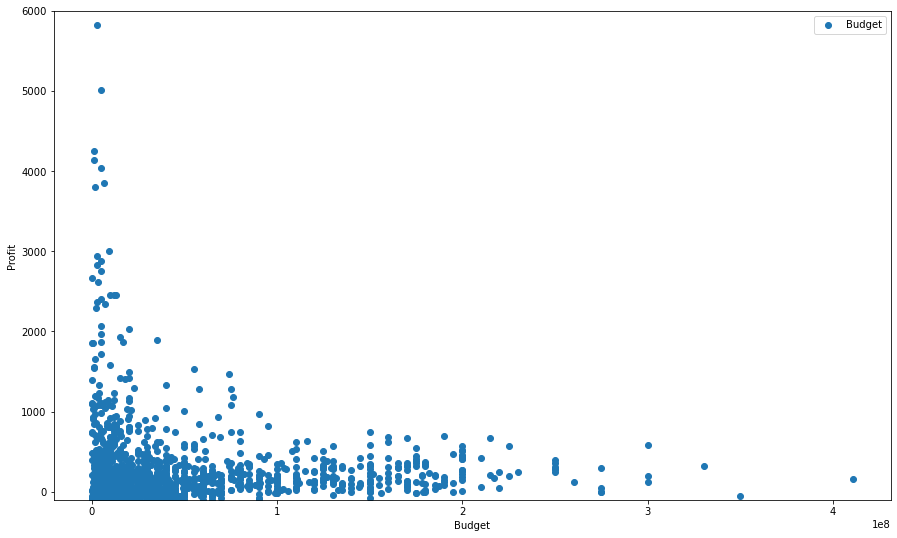

In [138]:
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter(imdb_budget.production_budget,imdb_budget.roi, label='Budget')

ax.set_xlabel("Budget")
ax.set_ylabel("Profit")
ax.set_ylim([-100, 6000])
plt.legend()

;

In [139]:
X=imdb_budget[['production_budget']]
y=imdb_budget.roi

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))

In [140]:
# Get model results
results = model.fit()
# Display results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.768
Date:                Thu, 23 Jan 2025   Prob (F-statistic):              0.184
Time:                        09:47:53   Log-Likelihood:                -12459.
No. Observations:                1462   AIC:                         2.492e+04
Df Residuals:                    1460   BIC:                         2.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               303.9807     40.739      7.462      0.000     224.067     383.894
production_budget -7.498e-07   5.64e-07     -1.330      0.184   -1.86e-06    3.56e-07
==============================================================================
Omnibus:                     3744.109   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50392156.471
Skew:                          27.381   Prob(JB):                         0.00
Kurtosis:                     910.872   Cond. No.                     9.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

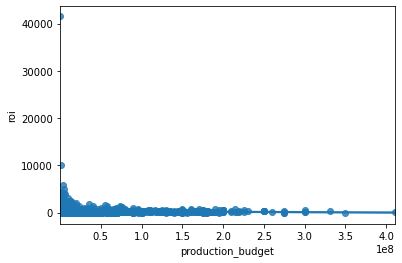

In [141]:
# Plot the model fit (scatter plot and regression line)
sns.regplot(x="production_budget",y="roi",data=imdb_budget);

In [ ]:
X=imdb_budget[['production_budget']]
y=imdb_budget.roi

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))

Data Preparation

Modeling

Evaluation

Deployment

In [ ]:
# budget[budget.index.duplicated(keep=False)].sort_values('movie').head(50)

In [ ]:
# imdb.reset_index(inplace=True)
# imdb.drop_duplicates(subset=['title','year'], keep=False)


# budget[budget.index.duplicated(keep=False)]

In [ ]:
# gross[gross.index.duplicated(keep=False)].sort_values('title').head(50)
# gross.drop_duplicates(subset='title', inplace=True)